In [2]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(parallel)
library(ComplexHeatmap)
library(ggsci)
library(tidyverse)
library(rstatix)
library(ggpubr)

In [6]:
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_cluster_top30_DEG.csv")

In [7]:
head(df)

,X,group,names,scores,logfoldchanges,pvals,pvals_adj
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,S100A8,31.86925,0.5851473,7.125324e-223,2.389691e-218
2,1,0,S100A9,31.27938,0.4593869,8.902605e-215,1.492878e-210
3,2,0,S100A12,27.27002,1.1024668,9.622664e-164,1.075750e-159
4,3,0,LYZ,26.65599,0.2799142,1.525381e-156,1.278955e-152
5,4,0,S100A6,24.41821,0.2494514,1.095656e-131,7.349223e-128
6,5,0,MNDA,22.94832,0.3317161,1.531457e-116,8.560333e-113


In [17]:
# Assuming you want to filter out rows where pvals_adj is greater than 0.05 (equivalent to 50 after log transformation),
# baseMean is greater than 50, and absolute value of log2FoldChange is greater than 2

df_filt <- df[(df$pvals_adj < 0.05) & (abs(df$logfoldchanges) > 2), ]
df_filt

,X,group,names,scores,logfoldchanges,pvals,pvals_adj
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
32250,32249,0,MS4A4A,-3.197823,-2.234695,1.384692e-03,2.707690e-02
32388,32387,0,HES4,-3.314303,-3.992381,9.187196e-04,1.971338e-02
32550,32549,0,CD79B,-3.508986,-2.100495,4.498195e-04,1.084547e-02
32610,32609,0,SEPT11,-3.576645,-2.058118,3.480327e-04,8.804337e-03
32824,32823,0,MGLL,-3.828793,-2.331911,1.287734e-04,3.940513e-03
33438,33437,0,SASH1,-6.379156,-2.365337,1.780667e-10,1.668157e-08
33490,33489,0,FCGR3A,-7.739986,-2.200594,9.942786e-15,1.282543e-12
33494,33493,0,RHOC,-7.835204,-2.196921,4.680840e-15,6.254423e-13
33507,33506,0,ATF3,-8.419376,-2.099503,3.784933e-17,5.743850e-15


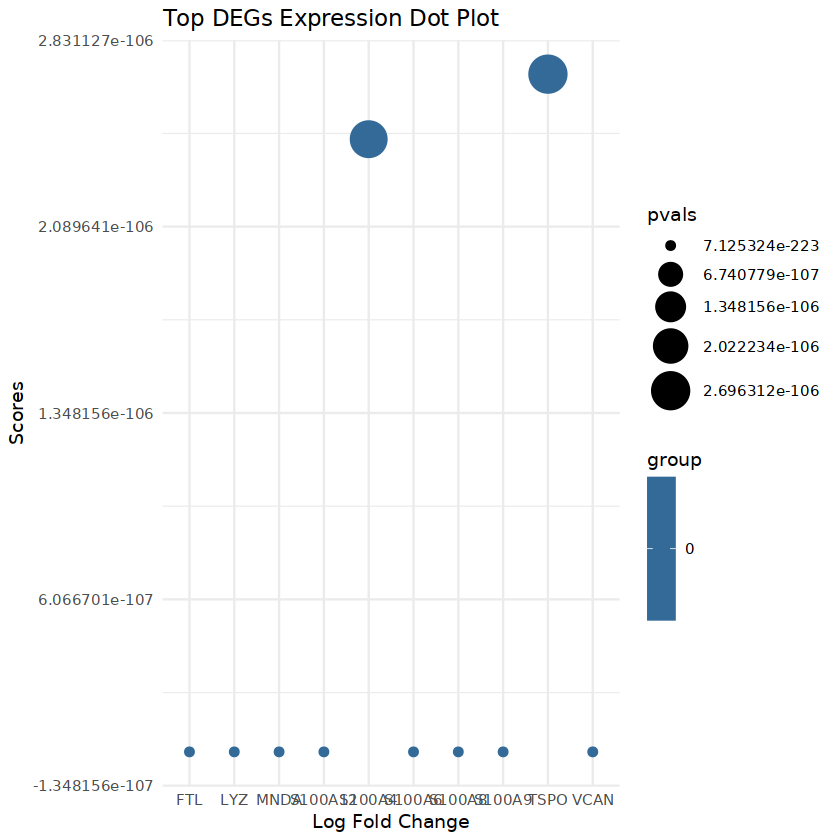

In [10]:

# Assuming your data frame is named df
# Sort the DataFrame by scores or adjusted p-values to get the top DEGs
top_DEGs <- df[order(-df$scores),][1:10,]  # Change 10 to the number of top genes you want to plot

# Plotting
ggplot(top_DEGs, aes(x=names, y=pvals, color=group, size=pvals)) +
  geom_point() +
  labs(x = "Log Fold Change", y = "Scores", title = "Top DEGs Expression Dot Plot") +
  scale_size_continuous(range = c(2, 10)) +  # Adjust the range for point sizes
  theme_minimal()
